# <h1><center> El Problema de la Dieta </center></h1>

### Seminario: Introducción a los Modelos de Optimización - ESE-IPN

A continuación describimos el modelo de optimización del problema de la dieta.

##### Conjuntos

<ol>
  <li>$F$, conjunto de alimentos $i$.</li>
  <li>$N$, conjunto de tipos de nutriente $j$.</li> 
</ol>

##### Parámetros

<ol>
  <li>$c_i \geq 0$, costo unitario del alimento $i\in F$,</li>
  <li>$r_{i,j} \geq 0$, cantidad de nutrientes de tipo $j$ contenidad en una unidad del alimento $i$,</li>
  <li>$fm_i\geq 0$, cantidad minima del alimento $i$ que debe contener la dieta,</li>
  <li>$FM_i\geq fm_i$, cantidad máxima del alimento $i$ que puede contener la dieta,</li>
  <li>$nm_j\geq 0$, cantidad minima del nutriente $j$ que debe contener la dieta,</li>
  <li>$NM_j\geq nm_j$, cantidad máxima del nutriente $j$ que puede contener la dieta.</li>
</ol>


##### Variables 

<ol>
  <li>$x_i \geq 0$, cantidad de alimento $i\in F$ que se incluirá en la dieta.</li>
</ol>

##### Función objetivo 

$$
\min \sum_{i \in F} c_ix_i \tag{1}
$$

##### Restricciones 

$$
fm_i \leq x_i \leq FM_i  \text{  para cada  }  i\in F,  \tag{2}
$$


$$
nm_j \leq \sum_{i\in F} x_ir_{i,j} \leq NM_j  \hsapce{0.5cm} \text{  para cada   }  \hsapce{0.2cm}  j\in N. \tag{3} 
$$

Primero importamos los módulos de Python que usaremos para resolver nuestro problema. 

In [31]:
#%%Se importan los módulos necesarios ------------------------------------------
import pandas as pd                                                            #para manipular tablas
import numpy as np
import matplotlib.pyplot as plt
from pulp import LpProblem, LpVariable, LpMinimize,lpSum, value                #para el modelo de optimización 
#------------------------------------------------------------------------------

Luego leemos los parámetros del modelo. Para este ejemplo, nuestros datos estan en un archivo Excel.  

In [32]:
file="C:/Users/A1644/OneDrive - Centro Nacional de Control de Energia (CENACE)/ESE-IPN- II-2017/Optimización/Python/BD_food.xlsx"

x=pd.ExcelFile(file)                                                           #lee el archivo excel

DF_F=x.parse('FOOD',index_col="FOOD")                                          #lee las tablas del archivo excel
DF_N=x.parse('NUTR',index_col="NUTR")
DF_FN=x.parse('FOOD_NUTR',index_col="FOOD_NUTR")       

print("-"*50)
print(DF_F)
print("-"*50)
print(DF_N)
print("-"*50)
print(DF_FN)
print("-"*50)

--------------------------------------------------
      cost  f_min  f_max
FOOD                    
BEEF  3.19      2     10
CHK   2.59      2     10
FISH  2.29      2     10
HAM   2.89      2     10
MCH   1.89      2     10
MTL   1.99      2     10
SPG   1.99      2     10
TUR   2.49      2     10
--------------------------------------------------
      n_min  n_max
NUTR              
A       700  20000
C       700  20000
B1      700  20000
B2      700  20000
NAA       0  50000
CAL   16000  24000
--------------------------------------------------
            A   C  B1  B2   NAA  CAL
FOOD_NUTR                           
BEEF       60  20  10  15   938  295
CHK         8   0  20  20  2180  770
FISH        8  10  15  10   945  440
HAM        40  40  35  10   278  430
MCH        15  35  15  15  1182  315
MTL        70  30  15  15   896  400
SPG        25  50  25  15  1329  370
TUR        60  20  15  10  1397  450
--------------------------------------------------


Ahora escribimos el modelo.

In [33]:
#%% Se define el problema------------------------------------------------------
Probf=LpProblem("Total_Cost",LpMinimize)

#se declaran las variables del modelo de optimización -------------------------
X=LpVariable.dicts("food", set(DF_F.index), lowBound=0, cat="Continuous")  

#Se define la función objetivo ------------------------------------------------ 
Probf+=lpSum(DF_F.loc[t,"cost"]*X[t] for t in DF_F.index)

#Se agregan las restricciones ------------------------------------------------- 
for i in DF_F.index:
    Probf+= X[i] >= DF_F.loc[i,"f_min"]
    Probf+= X[i] <= DF_F.loc[i,"f_max"]

#Se agregan las restricciones ------------------------------------------------- 
for j in DF_N.index:
    Probf+= lpSum(X[i]*DF_FN.loc[i,j] for i in DF_F.index) >= DF_N.loc[j,"n_min"]
    Probf+= lpSum(X[i]*DF_FN.loc[i,j] for i in DF_F.index) <= DF_N.loc[j,"n_max"]

#Se elige el solver------------------------------------------------------------ 
Probf.solve()    
    

1

NOTA.  Pulp no acepta las siguentes formas de restricción: 

(4)   Prob+= DF_N.loc[j,"n_min"] <= lpSum(X[i]*DF_FN.loc[i,j] for i in DF_F.index) <= DF_N.loc[j,"n_max"]

(5)   Prob+= DF_N.loc[j,"n_min"] <= lpSum(X[i]*DF_FN.loc[i,j] for i in DF_F.index)

En el primer caso (4), solo reconoce la ultima desigualdad. El segundo caso (5) nos mostrará un mensaje de error. 

A continuación mostramos la solución del problema de optimización.

In [35]:
for v in Prob.variables():
    print(v.name,"=",v.varValue)                                               #valor de las variables         

print("-"*50)
print("Valor Obj.","=", value(Prob.objective)) 

food_BEEF = 5.3606138
food_CHK = 2.0
food_FISH = 2.0
food_HAM = 10.0
food_MCH = 10.0
food_MTL = 10.0
food_SPG = 9.3060529
food_TUR = 2.0
--------------------------------------------------
Valor Obj. = 118.059403293


La solución anterior coencide con el que se muestra en la Página 35 del manual de AMPL.

### Reporte

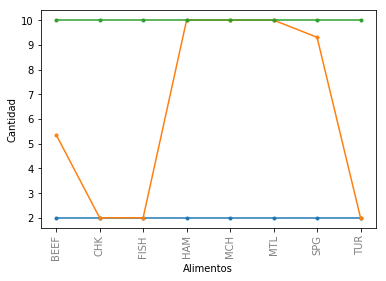

In [34]:
x1 = np.arange(len(DF_F.index))

ym = DF_F.loc[:,"f_min"]
ys = [v.varValue for v in Probf.variables()]
yM = DF_F.loc[:,"f_max"]

plt.plot(x1, ym, '.-')
plt.plot(x1, ys, '.-')
plt.plot(x1, yM, '.-')

plt.xticks(x1, DF_F.index, rotation='vertical', color = "gray")
plt.xlabel('Alimentos')
plt.ylabel('Cantidad')

plt.show()